## 第6章  函数(2)

### 6.7 生成器函数  
前面我们介绍了函数的返回值，可以一个或多个。如果返回百万个或更多值时，将消耗很大一部分资源，为解决这一问题，人们想到用生成器。具体方法很简单，就是把函数中return 语句换成yield语句即可，示例如下：

In [1]:
def gen61(n):
    for i in range(n):
        yield i

In [2]:
gen61(10)

<generator object gen61 at 0x00000000050B8348>

In [3]:
#遍历函数生成器gen61
#方法1：使用for循环遍历函数生成器
for i in gen61(10):
    print(i,end=" ")
print()
#方法2：使用next函数逐个遍历函数生成器

gen=gen61(10)

while True:
    try:  #因为不停调用next会报异常，所以要捕捉处理异常。
        x = next(gen)  #注意这里不能直接写next(gen61(10)),否则每次都是重复调用1
        print(x,end=" ")
    except StopIteration as e:
        break



0 1 2 3 4 5 6 7 8 9 
0 1 2 3 4 5 6 7 8 9 

### 6.8 把函数放在模块中
前面我们介绍了函数及函数参数等，函数定义好之后，我们可以调用，无需重写代码。不过这些函数如果仅停留内存中，回话(session)一旦关闭函数也不存在了，那么，如何永久保存定义好的函数？
	很简单，只要把这些函数放在模块中即可。所谓模块实际上就是扩展名为.py的文件。
如果当前运行的程序需要使用定义好的函数，只要导入对应的模块即可，导入模块的方式有多种，下面将介绍每种方式。

#### 6.8.1 导入整个模块  
（1）创建.py文件  
把以下代码保存在jupyter notebook当前目录下（当前路径Linux环境可通过!pwd查看，windows环境可通过system chdir），文件名称为fun_op.py

In [ ]:
#cat func_op.py具体内容如下：
#定义一个函数，累加截止自然数为n，作为参数传给这个函数
def sum_1n(n):
    """该函数的参数为自然数n，其功能为累加从1到n的n个连续自然数"""
    #定义一个存放累加数的变量
    j=0
    #用range(1,n+1)生成1到n连续n个自然数
    for i in range(1,n+1):
       j+=i
    #把累加结果作为返回值
    return j


#定义一个函数，接受任意数量的参数
def calc_sum(*lst):
    """累加所有参数"""
    sum=0
    for i in lst:
        sum+=i
    return sum     


（2）导入模块

In [5]:
import func_op

（3）调用函数  
导入模块func_op.py后，在jupyter notebook界面，通过模块名.+tab键 就可看到下图的内容。
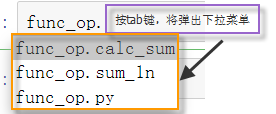


In [8]:
#查看函数的帮助信息，#'该函数的参数为自然数n，其功能为累加从1到n的n个连续自然数'
func_op.sum_1n.__doc__

'该函数的参数为自然数n，其功能为累加从1到n的n个连续自然数'

In [9]:
#调用函数
func_op.sum_1n(100)  #5050


5050

#### 6.8.2 导入需要的函数   
有时一个模块中有很多函数，其中很多函数暂时用不上或对应程序不需要这些函数，那么我们导入模块时，为节省资源，就可导入需要的函数，不需要的就不导入。导入需要函数的格式为：

In [11]:
#导入需要的函数sum_1n
from  func_op import sum_1n
#调用函数
sum_1n(100)  #5050

5050

有时函数名比较长，我们可以用取别名的方式，简化函数名称，调用时，直接使用别名就可。

In [12]:
#导入需要的函数sum_1n,并简称为sn
from  func_op import sum_1n  as sn
#调用函数
sn(100)

5050

#### 6.8.3 导入所有函数  
调用函数时也无需使用句点，直接调用函数名即可。示例如下：

In [14]:
#导入模块中的所有函数
from func_op import *
sum_1n(1000) #500500

500500

#### 6.8.4 主程序  
Python一般都是从上往下执行的，为了更好控制执行流程，在编写众多Python程序中，通常至少一个会使用main(),根据不成为文的约定，带有main()函数的程序，被认为是主程序，它是程序运行的起点。主程序可以导入其它模块，然后使用这些模块中的函数、变量等。例如，创建一个名为train_sum.py的主程序，该程序作为执行起点。

In [1]:
import func_op

#定义一个主函数
def main():
#输入一个自然数n
    n=input("输入一个自然数: ")
    #把字符型转换为整数型
    n=int(n)
    #调用模块func_op中的函数sum_1n
    result=func_op.sum_1n(n)
    print("1到{}的连续自然数的和为{}".format(n,result))

##判断是否以主程序形式运行      
if __name__=='__main__':
    main()


输入一个自然数: 100
1到100的连续自然数的和为5050


In [2]:
#把train_sum.py脚本、fun_op.py脚本都放在jupyter当前目录下
run train_sum.py

输入一个自然数: 100
1到100的连续自然数的和为5050


<mark style=background-color:yellow>修改python脚本接受参数的方式，由从input语句接受改为从命令行接受参数，为便于维护，脚本名称改为tain_sum_args.py,详细代码如下：</mark>  

在命令行执行，示意图
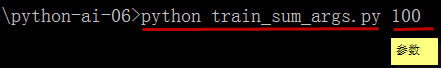